In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import *
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import chi2, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
%matplotlib inline
import scipy.sparse

### Importing csv files

In [2]:
test = pd.read_csv("/Users/valayaramchandani/Downloads/test.csv",header=None)
train = pd.read_csv("/Users/valayaramchandani/Downloads/train.csv",header=None)
val = pd.read_csv("/Users/valayaramchandani/Downloads/validation.csv",header= None)

In [3]:
test

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,Sample_0151,0.154889,0.194438,0.016576,0.015238,0.508214,0.609091,0.957868,1.037584,0.365718,...,0.018635,0.012432,0.023477,0.000000,0.136220,0.265049,0.022616,0.000015,0.126962,0.109224
1,Sample_0067,0.098058,0.034549,0.000000,0.004972,0.045705,0.516520,0.834578,0.324621,0.051842,...,0.994001,0.598735,0.309948,0.115355,0.036416,0.160725,0.088597,0.078912,0.524258,0.178112
2,Sample_0158,0.086692,0.001742,0.004123,0.003968,0.296859,0.317567,0.717138,0.560827,0.403185,...,0.047434,0.277109,0.018702,0.151312,0.008982,0.006660,0.015204,0.005110,0.002231,0.101355
3,Sample_0203,0.074107,0.000000,0.000000,0.001597,0.362387,1.237493,0.842006,0.052196,0.153114,...,0.007665,0.002261,0.010525,0.002288,0.000000,0.000000,0.000000,0.000000,0.039200,0.038988
4,Sample_0103,0.130992,0.000000,0.000000,0.005639,0.177445,0.090002,0.042558,0.238993,0.264651,...,0.021457,0.110615,0.147917,0.298860,0.000000,0.003172,0.012072,0.000000,0.000000,0.005608
5,Sample_0036,0.350147,0.406686,0.012567,0.005707,0.508947,1.020529,1.466650,0.935255,0.006318,...,0.000000,0.000113,0.069013,0.001634,0.000000,0.000000,0.002581,0.003455,0.002777,0.005424
6,Sample_0165,0.004216,0.064279,0.006726,0.000000,0.215768,1.007029,1.237645,0.135756,0.015485,...,0.000000,0.000581,0.105683,0.979075,0.452313,0.402273,0.046690,0.025238,0.000895,0.003138
7,Sample_0202,0.171799,0.254934,0.021560,0.066583,1.322550,1.741156,0.828484,0.036001,0.028794,...,0.000000,0.031611,0.065051,0.345219,0.744213,0.041486,0.002034,0.010906,0.000000,0.002794
8,Sample_0035,0.242340,0.549382,0.201396,0.000428,0.030068,0.853964,1.380444,0.681194,0.226354,...,0.000000,0.001767,0.000000,0.000000,0.000146,0.000000,0.001013,0.083613,0.055495,0.039448
9,Sample_0133,0.142072,0.670612,0.393482,0.036615,0.000000,0.019134,0.967431,0.940636,0.255390,...,0.000000,0.000007,0.386836,0.178931,0.075766,0.115252,0.541068,0.420976,0.000000,0.005986


In [4]:
x_train = train.copy()
y_train = train[1]
x_train.drop(x_train.iloc[:, 0:2], inplace=True, axis=1)

In [5]:
x_val = val.copy()
y_val = val[1]
x_val.drop(x_val.iloc[:, 0:2], inplace=True, axis=1)

In [6]:
x_test = test.copy()
y_test = test[0]
x_test.drop(x_test.iloc[:,0:1], inplace=True, axis=1 )
y_test

0     Sample_0151
1     Sample_0067
2     Sample_0158
3     Sample_0203
4     Sample_0103
5     Sample_0036
6     Sample_0165
7     Sample_0202
8     Sample_0035
9     Sample_0133
10    Sample_0066
11    Sample_0115
12    Sample_0039
13    Sample_0186
14    Sample_0028
15    Sample_0056
16    Sample_0092
17    Sample_0182
18    Sample_0012
19    Sample_0205
20    Sample_0091
21    Sample_0011
22    Sample_0070
23    Sample_0166
24    Sample_0101
25    Sample_0187
26    Sample_0013
27    Sample_0087
28    Sample_0071
29    Sample_0146
30    Sample_0037
31    Sample_0065
32    Sample_0084
33    Sample_0027
34    Sample_0026
35    Sample_0152
36    Sample_0131
37    Sample_0016
38    Sample_0170
39    Sample_0129
40    Sample_0201
Name: 0, dtype: object

### Adding a column of 1s

In [7]:
x_train.insert(loc=0, column=1, value=1.0)


In [8]:
x_val.insert(loc=0, column=1, value=1.0)

In [9]:
x_test.insert(loc=0, column=0, value=1.0)

In [10]:
for i in range(0, 2050):
    x_train.rename(columns={i: i-1}, inplace=True)
x_train

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,1.0,0.001818,0.058018,0.079352,0.017937,0.138092,0.781016,0.809967,0.040714,0.000000,...,0.000000,0.000000,0.011508,0.068883,0.080087,0.214424,0.041340,0.000000,0.000000,0.000656
1,1.0,0.130129,0.223518,0.022346,0.007356,0.883341,0.961499,0.819911,0.301842,0.195972,...,0.013055,0.024077,0.392501,0.330532,0.056257,0.053240,0.054429,0.061702,0.019216,0.018923
2,1.0,0.272370,0.041683,0.261952,0.337672,0.904324,1.291325,0.854422,0.198708,0.405038,...,0.058794,0.200053,0.010550,0.019223,0.000900,0.000000,0.000349,0.000000,0.004310,0.075912
3,1.0,0.561121,1.004120,0.113220,0.017158,0.034897,0.083389,0.812934,1.371410,0.804364,...,1.233769,0.591835,0.257092,0.003301,0.000181,0.000074,0.008841,0.082230,0.760075,0.242426
4,1.0,0.307962,0.060208,0.000000,0.004815,0.000000,0.110576,0.932561,0.736380,0.574772,...,0.340173,0.245761,0.319120,0.084845,0.227459,0.047097,0.008360,0.085537,0.737439,0.541516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.0,0.080337,0.113459,0.000000,0.263067,0.793175,0.708464,0.677974,0.658172,0.334076,...,1.085883,0.240108,0.546721,0.075773,0.000000,0.000000,0.074494,0.131913,0.439946,0.048584
140,1.0,0.282189,0.167384,0.000000,0.006451,0.517041,0.508104,0.998750,0.882848,0.684527,...,0.000000,0.000000,0.042506,0.000000,0.000000,0.006734,0.016319,0.003699,0.005598,0.004469
141,1.0,0.144755,0.008022,0.233142,0.229731,0.425840,1.006119,1.492812,0.199921,0.124334,...,0.000000,0.000000,0.000000,0.044381,0.051433,0.093931,0.000000,0.000000,0.000000,0.001446
142,1.0,0.051360,0.000000,0.002099,0.278802,1.249910,1.254209,0.548353,0.066152,0.038942,...,0.000000,0.000000,0.106748,0.710095,1.698106,0.650351,0.097046,0.001933,0.000000,0.000695


In [11]:
for i in range(0, 2050):
    x_val.rename(columns={i: i-1}, inplace=True)
x_val

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,1.0,0.861231,1.196187,0.891775,0.246000,0.304779,0.327325,0.371403,0.922999,0.807974,...,0.526902,0.459115,0.457802,0.033232,0.368890,0.269538,0.048582,0.074251,0.452948,0.350218
1,1.0,0.207111,0.079170,0.016595,0.010206,0.298020,0.070030,0.089516,0.008703,0.735020,...,0.138625,0.446480,0.050020,0.085055,0.299308,0.043929,0.051008,0.098806,1.076434,0.731704
2,1.0,0.635742,0.279725,0.033033,0.047822,0.736427,0.839229,0.982129,0.856600,0.723810,...,0.000000,0.000000,0.037842,0.427024,2.042293,1.470971,0.809386,0.103609,0.014270,0.014284
3,1.0,0.162205,0.000231,0.000000,0.000000,0.013716,0.162195,0.383363,0.580414,0.383145,...,0.233874,0.253131,0.172464,0.120456,0.254290,0.101869,0.005896,0.000000,0.544907,0.426949
4,1.0,0.388722,0.938067,0.762723,0.136639,0.229058,0.164377,0.303112,0.627291,0.627911,...,0.413360,0.125176,0.668717,0.081628,0.025815,0.001790,0.016391,0.349890,0.494582,0.149095
5,1.0,0.344989,0.134718,0.000000,0.008344,0.039572,0.134253,0.059668,0.090834,0.364173,...,0.421331,0.113530,0.148857,0.060694,0.028495,0.015574,0.000000,0.002385,0.553193,0.195847
6,1.0,0.030381,0.006090,0.140867,0.066486,0.833170,1.062055,0.797418,0.076539,0.038473,...,0.000000,0.000397,0.071864,0.282459,0.010368,0.127055,0.174733,0.330581,0.002867,0.002314
7,1.0,0.091705,0.001789,0.003917,0.099685,0.329335,0.810078,1.036182,0.912676,0.105417,...,0.015287,0.103595,0.026636,0.000000,0.000204,0.011291,0.000685,0.001383,0.005856,0.049392
8,1.0,0.104560,0.418399,0.135956,0.000000,0.319023,0.689927,0.459440,0.018177,0.263321,...,0.051708,0.016010,0.057250,0.100238,0.037927,0.150842,0.076362,0.033851,0.065156,0.015049
9,1.0,0.265712,0.344884,0.002987,0.000001,0.157350,0.193873,0.451870,0.689829,0.051034,...,0.151063,0.090460,0.386190,0.036432,0.323760,0.214729,0.006214,0.020237,0.701658,0.476364


In [12]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,1.0,0.154889,0.194438,0.016576,0.015238,0.508214,0.609091,0.957868,1.037584,0.365718,...,0.018635,0.012432,0.023477,0.000000,0.136220,0.265049,0.022616,0.000015,0.126962,0.109224
1,1.0,0.098058,0.034549,0.000000,0.004972,0.045705,0.516520,0.834578,0.324621,0.051842,...,0.994001,0.598735,0.309948,0.115355,0.036416,0.160725,0.088597,0.078912,0.524258,0.178112
2,1.0,0.086692,0.001742,0.004123,0.003968,0.296859,0.317567,0.717138,0.560827,0.403185,...,0.047434,0.277109,0.018702,0.151312,0.008982,0.006660,0.015204,0.005110,0.002231,0.101355
3,1.0,0.074107,0.000000,0.000000,0.001597,0.362387,1.237493,0.842006,0.052196,0.153114,...,0.007665,0.002261,0.010525,0.002288,0.000000,0.000000,0.000000,0.000000,0.039200,0.038988
4,1.0,0.130992,0.000000,0.000000,0.005639,0.177445,0.090002,0.042558,0.238993,0.264651,...,0.021457,0.110615,0.147917,0.298860,0.000000,0.003172,0.012072,0.000000,0.000000,0.005608
5,1.0,0.350147,0.406686,0.012567,0.005707,0.508947,1.020529,1.466650,0.935255,0.006318,...,0.000000,0.000113,0.069013,0.001634,0.000000,0.000000,0.002581,0.003455,0.002777,0.005424
6,1.0,0.004216,0.064279,0.006726,0.000000,0.215768,1.007029,1.237645,0.135756,0.015485,...,0.000000,0.000581,0.105683,0.979075,0.452313,0.402273,0.046690,0.025238,0.000895,0.003138
7,1.0,0.171799,0.254934,0.021560,0.066583,1.322550,1.741156,0.828484,0.036001,0.028794,...,0.000000,0.031611,0.065051,0.345219,0.744213,0.041486,0.002034,0.010906,0.000000,0.002794
8,1.0,0.242340,0.549382,0.201396,0.000428,0.030068,0.853964,1.380444,0.681194,0.226354,...,0.000000,0.001767,0.000000,0.000000,0.000146,0.000000,0.001013,0.083613,0.055495,0.039448
9,1.0,0.142072,0.670612,0.393482,0.036615,0.000000,0.019134,0.967431,0.940636,0.255390,...,0.000000,0.000007,0.386836,0.178931,0.075766,0.115252,0.541068,0.420976,0.000000,0.005986


## Gradient Descent

In [13]:
x_train.to_numpy()

array([[1.0000000e+00, 1.8177130e-03, 5.8017675e-02, ..., 0.0000000e+00,
        0.0000000e+00, 6.5558000e-04],
       [1.0000000e+00, 1.3012905e-01, 2.2351807e-01, ..., 6.1702310e-02,
        1.9215569e-02, 1.8922858e-02],
       [1.0000000e+00, 2.7236962e-01, 4.1682660e-02, ..., 0.0000000e+00,
        4.3101500e-03, 7.5912185e-02],
       ...,
       [1.0000000e+00, 1.4475472e-01, 8.0222160e-03, ..., 0.0000000e+00,
        0.0000000e+00, 1.4458970e-03],
       [1.0000000e+00, 5.1360298e-02, 0.0000000e+00, ..., 1.9327340e-03,
        0.0000000e+00, 6.9466200e-04],
       [1.0000000e+00, 0.0000000e+00, 2.1897770e-02, ..., 7.0213340e-01,
        2.0704365e-01, 6.6620240e-03]])

In [14]:
def gradientDescent(X_val,Y_val,X, Y, alpha=0.0029, maxNumIterations=200):
    m = np.shape(X)[0] #total samples
    n = np.shape(X)[1]  # total number of features = 2049
    #W = np.random.randn(n)
    W = np.zeros(n)
    cost_history_list = []
    cost_history_list_val = []
    reltol = 0.001
    diff = 0
    for current_iteration in range(maxNumIterations):  # begin the process
 
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - Y
 
        # calculate the cost (Mean squared error - MSE)
        cost_train = (1.0/np.shape(X)[0])*(np.linalg.norm(X.dot(W)-Y,2)**2) 
        
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated_val = X_val.dot(W)
 
        # calculate the difference between the actual and predicted value
        error_val = y_estimated_val - Y_val
 
        # calculate the cost (Mean squared error - MSE)
        cost_val = (1.0/np.shape(X_val)[0])*(np.linalg.norm(X_val.dot(W)-Y_val,2)**2)
        if(current_iteration > 0):
            diff = (cost_history_list_val[-1] - cost_val)/cost_history_list_val[-1]
            if(np.abs(diff)<reltol):
                cost_history_list.append(cost_train)
                cost_history_list_val.append(cost_val)
                break
        # Update our gradient by the dot product between
        # the transpose of 'X' and our error divided by the
        # total number of samples
        gradient = (1 / m) * X.T.dot(error)
 
        # Now we have to update our weights
        W = W - alpha * gradient
        cost_history_list.append(cost_train)
        cost_history_list_val.append(cost_val)
        
    #return W, cost_history_list,diff, current_iteration,cost_history_list_val
    return x_test.dot(W)

#### Training data, alpha = 0.1

In [15]:
w_train1, costlist_train1, d_train1, iter_no_train1,costlist_val1 = gradientDescent(x_val,y_val,x_train, y_train, 0.1, 200)

/var/folders/8v/4n20m59n1z7g8vbcnjym5g_r0000gn/T/ipykernel_58381/1009543841.py:30: RuntimeWarning: invalid value encountered in double_scalars
  diff = (cost_history_list_val[-1] - cost_val)/cost_history_list_val[-1]


In [519]:
w_train1.shape


(2049,)

In [16]:
MSE_final_train1 = (1.0/np.shape(x_train)[0])*(np.linalg.norm(x_train.dot(w_train1)-y_train,2)**2) 
MAE_final_train1 = (1.0/np.shape(x_train)[0])*np.linalg.norm(x_train.dot(w_train1)-y_train,1)

In [17]:
MSE_final_train1

nan

In [18]:
MAE_final_train1

nan

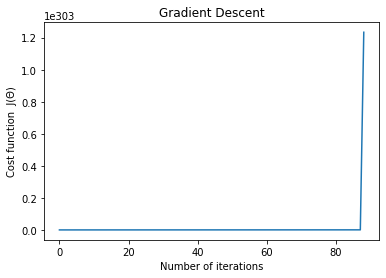

In [19]:
plt.plot(np.arange(len(costlist_train1)), costlist_train1)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function  J(Θ)")
plt.title("Gradient Descent")
plt.show()

The learning rate is not appropriate because the cost function is diverging.

#### Validation data, alpha = 0.1

In [20]:
MSE_final_val1 = (1.0/np.shape(x_val)[0])*(np.linalg.norm(x_val.dot(w_train1)-y_val,2)**2) 
MAE_final_val1 = (1.0/np.shape(x_val)[0])*np.linalg.norm(x_val.dot(w_train1)-y_val,1)

In [21]:
MSE_final_val1

nan

In [22]:
MAE_final_val1

nan

#### Training data, alpha = 0.01

In [23]:
w_train2, costlist_train2, d_train2, iter_no_train2, costlist_val2 = gradientDescent(x_val, y_val,x_train, y_train, 0.01, 200)

In [24]:
w_train2

0      -1.413731e+124
1      -2.279879e+123
2      -2.123535e+123
3      -1.270088e+123
4      -1.280716e+123
            ...      
2044   -5.000801e+123
2045   -2.078604e+123
2046   -1.250229e+123
2047   -3.017963e+123
2048   -2.076396e+123
Length: 2049, dtype: float64

In [25]:
costlist_train2

[30.819444444444443,
 547.8359423829286,
 9989.714541049872,
 182362.6820667957,
 3329224.7334071887,
 60778715.64128273,
 1109583502.704852,
 20256689310.685116,
 369808546184.8461,
 6751269111006.126,
 123251977488098.27,
 2250102862876960.2,
 4.1078147358860936e+16,
 7.499275781013772e+17,
 1.3690767684431229e+19,
 2.4994029458632357e+20,
 4.562939953245835e+21,
 8.330157828847479e+22,
 1.520763590240707e+24,
 2.7763242244856503e+25,
 5.0684907561771844e+26,
 9.253097429646525e+27,
 1.689256549164713e+29,
 3.083926988332687e+30,
 5.630054046005877e+31,
 1.0278294097385316e+33,
 1.8764176807022347e+34,
 3.42561059169113e+35,
 6.253835724631837e+36,
 1.1417077400900275e+38,
 2.084315324509446e+39,
 3.8051510202097355e+40,
 6.9467292766803085e+41,
 1.268203216828631e+43,
 2.3152469818761636e+44,
 4.2267426197602985e+45,
 7.716391950210397e+46,
 1.4087137563310756e+48,
 2.5717647056825575e+49,
 4.695044448646725e+50,
 8.571329377863126e+51,
 1.5647921570794808e+53,
 2.856703303435406e+5

In [26]:
iter_no_train2

199

In [27]:
MSE_final_train2 = (1.0/np.shape(x_train)[0])*(np.linalg.norm(x_train.dot(w_train2)-y_train,2)**2) 
MAE_final_train2 = (1.0/np.shape(x_train)[0])*np.linalg.norm(x_train.dot(w_train2)-y_train,1)

In [28]:
MSE_final_train2

5.733296336461581e+253

In [29]:
MAE_final_train2

7.454207293577716e+126

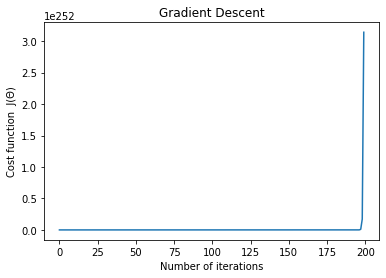

In [30]:
plt.plot(np.arange(len(costlist_train2)), costlist_train2)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function  J(Θ)")
plt.title("Gradient Descent")
plt.show()

#### Validation data, alpha = 0.01

In [31]:
MSE_final_val2 = (1.0/np.shape(x_val)[0])*(np.linalg.norm(x_val.dot(w_train2)-y_val,2)**2) 
MAE_final_val2 = (1.0/np.shape(x_val)[0])*np.linalg.norm(x_val.dot(w_train2)-y_val,1)

In [32]:
MSE_final_val2

5.862635509157451e+253

In [33]:
MAE_final_val2

7.583729801570424e+126

#### Training data, alpha = 0.001

In [34]:
w_train3, costlist_train3, d_train3, iter_no_train3, costlist_val3= gradientDescent(x_val, y_val, x_train, y_train, 0.001, 200)

In [35]:
w_train3

0       0.010046
1       0.000252
2      -0.000196
3       0.001799
4       0.002208
          ...   
2044    0.003466
2045    0.001794
2046    0.001608
2047    0.000645
2048    0.000180
Length: 2049, dtype: float64

In [36]:
costlist_train3

[30.819444444444443,
 7.522269816631835,
 2.300243170555193,
 1.1191051892117378,
 0.8424038919897604,
 0.7690642765344747,
 0.7422697921500659,
 0.7268479772858714,
 0.714825872215684,
 0.7043224286023176,
 0.694829908115378,
 0.6861579604014243,
 0.6781963829115113,
 0.6708609875671864,
 0.6640805223082389,
 0.6577928864063609,
 0.6519435273425443,
 0.646484417148048,
 0.6413732390089738,
 0.6365726918121083,
 0.6320498833775926,
 0.6277757982664793,
 0.6237248303560493,
 0.619874372146765,
 0.6162044538710535,
 0.6126974263455446,
 0.6093376822513603,
 0.6061114111746783,
 0.6030063843075527,
 0.600011765207432,
 0.5971179434515639,
 0.5943163884070838,
 0.591599520675313,
 0.5889605990655059,
 0.5863936212139259,
 0.5838932361930844,
 0.5814546676570355,
 0.5790736462453298,
 0.576746350123368,
 0.5744693526732328,
 0.5722395764688133,
 0.5700542527742113,
 0.567910885896845,
 0.5658072218078154,
 0.5637412205134078,
 0.5617110317242623,
 0.5597149734237327,
 0.5577515129853455,
 0

In [37]:
iter_no_train3

56

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.dot(x_train,w_train3.T),y_train)

0.5413499299098377

In [39]:
MSE_final_train3 = (1.0/np.shape(x_train)[0])*(np.linalg.norm(x_train.dot(w_train3)-y_train,2)**2) 
MAE_final_train3 = (1.0/np.shape(x_train)[0])*np.linalg.norm(x_train.dot(w_train3)-y_train,1)

In [40]:
MSE_final_train3

0.5413499299098377

In [41]:
MAE_final_train3

0.5794289659706217

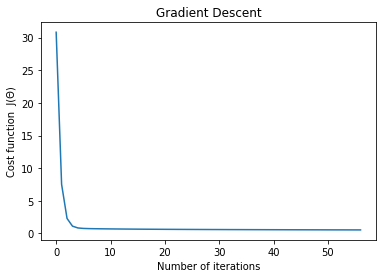

In [42]:
plt.plot(np.arange(len(costlist_train3)), costlist_train3)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function  J(Θ)")
plt.title("Gradient Descent")
plt.show()

#### Validation data, alpha = 0.001

In [43]:
MSE_final_val3 = (1.0/np.shape(x_val)[0])*(np.linalg.norm(x_val.dot(w_train3)-y_val,2)**2) 
MAE_final_val3 = (1.0/np.shape(x_val)[0])*np.linalg.norm(x_val.dot(w_train3)-y_val,1)

In [44]:
MSE_final_val3

0.5955611480114453

In [45]:
MAE_final_val3

0.5889523824089087

In [46]:
i=0.001
mse_history_list = []
mae_history_list = []
i_list = []
while i<0.0038:
    w_train3, costlist_train3, d_train3, iter_no_train3, costlist_val3 = gradientDescent(x_val,y_val,x_train, y_train, i, 200)
    mse = (1.0/np.shape(x_val)[0])*(np.linalg.norm(x_val.dot(w_train3)-y_val,2)**2) 
    mae = (1.0/np.shape(x_val)[0])*np.linalg.norm(x_val.dot(w_train3)-y_val,1)
    mse_history_list.append(mse)
    mae_history_list.append(mae)
    i_list.append(i)
    i=i+0.0002


In [47]:
mse_history_list

[0.5955611480114453,
 0.5915828375125576,
 0.5881622501415527,
 0.5848910625596482,
 0.5815506109656662,
 0.5791693005833446,
 0.57654776813077,
 0.5747725030877593,
 0.5732418423683079,
 0.5724725956275752,
 0.5713311523261508,
 0.6449038512435423,
 0.7550954898248033,
 0.5636160451936086]

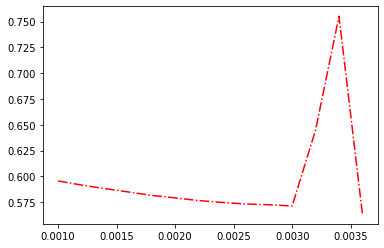

In [48]:
plt.plot(i_list, mse_history_list, 'r-.')
plt.show()

It can be observed that there is a minima around learning rate = 0.0035, which is why we tune the parameter to be set around this value for our model. 

## Tuning Linear Regression

In [16]:
result = gradientDescent(x_val, y_val,x_train, y_train, 0.0029, 200)

In [ ]:
result = gradientDescent(x_te, y_val,x_train, y_train, 0.0029, 200)

In [17]:
result

0     6.136162
1     4.612147
2     6.289366
3     5.127442
4     6.060842
5     6.489535
6     6.965618
7     6.078296
8     6.028169
9     4.187467
10    2.676053
11    3.401808
12    6.959149
13    6.978351
14    5.352260
15    3.267250
16    2.132263
17    6.822557
18    6.212111
19    5.327333
20    4.502386
21    6.218990
22    3.283876
23    7.151204
24    4.657244
25    6.543220
26    5.692249
27    3.859895
28    4.161608
29    6.164421
30    6.212637
31    2.621253
32    4.607847
33    5.131561
34    5.385868
35    5.426127
36    4.956959
37    6.427862
38    5.746463
39    6.118240
40    6.208915
dtype: float64

In [18]:
y_test

0     Sample_0151
1     Sample_0067
2     Sample_0158
3     Sample_0203
4     Sample_0103
5     Sample_0036
6     Sample_0165
7     Sample_0202
8     Sample_0035
9     Sample_0133
10    Sample_0066
11    Sample_0115
12    Sample_0039
13    Sample_0186
14    Sample_0028
15    Sample_0056
16    Sample_0092
17    Sample_0182
18    Sample_0012
19    Sample_0205
20    Sample_0091
21    Sample_0011
22    Sample_0070
23    Sample_0166
24    Sample_0101
25    Sample_0187
26    Sample_0013
27    Sample_0087
28    Sample_0071
29    Sample_0146
30    Sample_0037
31    Sample_0065
32    Sample_0084
33    Sample_0027
34    Sample_0026
35    Sample_0152
36    Sample_0131
37    Sample_0016
38    Sample_0170
39    Sample_0129
40    Sample_0201
Name: 0, dtype: object

In [50]:
iter_no_train4

45

In [54]:
MSE_final_train4 = (1.0/np.shape(x_train)[0])*(np.linalg.norm(x_train.dot(w_train4)-y_train,2)**2) 
MAE_final_train4 = (1.0/np.shape(x_train)[0])*np.linalg.norm(x_train.dot(w_train4)-y_train,1)

In [55]:
MSE_final_train3 


0.5413499299098377

In [56]:
MAE_final_train3 

0.5794289659706217

In [51]:
MSE_final_val4 = (1.0/np.shape(x_val)[0])*(np.linalg.norm(x_val.dot(w_train4)-y_val,2)**2) 
MAE_final_val4 = (1.0/np.shape(x_val)[0])*np.linalg.norm(x_val.dot(w_train4)-y_val,1)

In [52]:
MSE_final_val4

0.5716057861820171

In [53]:
MAE_final_val4

0.5754923908858876

### Ridge Regression

In [144]:
def least_squaresL2(x, y, Penalty_factor):
    xTx = x.T.dot(x)
    n = xTx.shape[0]
    xTx_mod = xTx + Penalty_factor*np.identity(n)
    xTx_inv = np.linalg.inv(xTx_mod)
    w = xTx_inv.dot(x.T.dot(y))
    return w

def gradientDescent_ridge(X_val, Y_val,X, Y,lmbda):
    m = np.shape(X)[0] #total samples
    n = np.shape(X)[1]  # total number of features = 2049
   
    cost_history_list = []
    cost_history_list_val = []
    W = least_squaresL2(X, Y, lmbda)
    
    y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
    error = y_estimated - Y

    # calculate the cost (Mean squared error - MSE)
    cost_train = (1/m) * np.sum(error ** 2)

    # compute the dot product between our feature 'X' and weight 'W'
    y_estimated_val = X_val.dot(W)

    # calculate the difference between the actual and predicted value
    error_val = y_estimated_val - Y_val

    # calculate the cost (Mean squared error - MSE)
    cost_val = (1.0/np.shape(X_val)[0])*(np.linalg.norm(X_val.dot(W)-Y_val,2)**2)

    cost_history_list.append(cost_train)
    cost_history_list_val.append(cost_val)
        
    return x_test.dot(W)

In [19]:
def least_squaresL2(x, y, Penalty_factor):
    xTx = x.T.dot(x)
    n = xTx.shape[0]
    xTx_mod = xTx + Penalty_factor*np.identity(n)
    xTx_inv = np.linalg.inv(xTx_mod)
    w = xTx_inv.dot(x.T.dot(y))
    return w

def gradientDescent_ridge(X_val, Y_val,X, Y,lmbda):
    m = np.shape(X)[0] #total samples
    n = np.shape(X)[1]  # total number of features = 2049

    W = least_squaresL2(X, Y, lmbda)      
    return x_test.dot(W)

In [20]:
result_ridge = gradientDescent_ridge(x_val,y_val,x_train, y_train,5)

In [21]:
result_ridge

0     4.421790
1     4.549153
2     6.221123
3     5.108394
4     6.207262
5     5.755044
6     8.169122
7     5.738746
8     7.803576
9     3.586538
10    2.415061
11    3.854021
12    6.440037
13    6.917109
14    4.881262
15    4.471678
16    2.631738
17    7.166223
18    7.696200
19    4.319955
20    4.973826
21    6.149357
22    3.096139
23    7.326492
24    4.113779
25    7.145768
26    5.402071
27    4.551831
28    3.280053
29    6.222711
30    5.355745
31    2.877526
32    4.757315
33    5.131663
34    5.738699
35    5.458547
36    3.868745
37    6.668495
38    5.591397
39    5.737472
40    5.815884
dtype: float64

In [203]:
w_ridge, cost_history_list_ridge,cost_history_list_val_ridge = gradientDescent_ridge(x_val,y_val,x_train, y_train,5)

In [204]:
MSE_ridge_train = (1.0/np.shape(x_train)[0])*(np.linalg.norm(x_train.dot(w_ridge)-y_train,2)**2) 
MAE_ridge_train = (1.0/np.shape(x_train)[0])*np.linalg.norm(x_train.dot(w_ridge)-y_train,1)

In [205]:
MSE_ridge_train

0.010934531170462945

In [206]:
MAE_ridge_train

0.07889978303585057

In [207]:
MSE_ridge = (1.0/np.shape(x_val)[0])*(np.linalg.norm(x_val.dot(w_ridge)-y_val,2)**2) 
MAE_ridge = (1.0/np.shape(x_val)[0])*np.linalg.norm(x_val.dot(w_ridge)-y_val,1)

In [208]:
MSE_ridge

0.9941008325354221

In [209]:
MAE_ridge

0.8013403463361971

In [210]:
w_ridge, cost_history_list_ridge,cost_history_list_val_ridge = gradientDescent_ridge(x_val,y_val,x_train, y_train,25)

In [211]:
MSE_ridge_train = (1.0/np.shape(x_train)[0])*(np.linalg.norm(x_train.dot(w_ridge)-y_train,2)**2) 
MAE_ridge_train = (1.0/np.shape(x_train)[0])*np.linalg.norm(x_train.dot(w_ridge)-y_train,1)

In [212]:
MSE_ridge_train

0.0793657595908272

In [213]:
MAE_ridge_train

0.21933983006415908

In [214]:
MSE_ridge = (1.0/np.shape(x_val)[0])*(np.linalg.norm(x_val.dot(w_ridge)-y_val,2)**2) 
MAE_ridge = (1.0/np.shape(x_val)[0])*np.linalg.norm(x_val.dot(w_ridge)-y_val,1)

In [215]:
MSE_ridge

0.8163450091376397

In [216]:
MAE_ridge

0.6976963305884389

### Linear Regression Model fitting

In [62]:
x_train.to_numpy()

array([[1.0000000e+00, 1.8177130e-03, 5.8017675e-02, ..., 0.0000000e+00,
        0.0000000e+00, 6.5558000e-04],
       [1.0000000e+00, 1.3012905e-01, 2.2351807e-01, ..., 6.1702310e-02,
        1.9215569e-02, 1.8922858e-02],
       [1.0000000e+00, 2.7236962e-01, 4.1682660e-02, ..., 0.0000000e+00,
        4.3101500e-03, 7.5912185e-02],
       ...,
       [1.0000000e+00, 1.4475472e-01, 8.0222160e-03, ..., 0.0000000e+00,
        0.0000000e+00, 1.4458970e-03],
       [1.0000000e+00, 5.1360298e-02, 0.0000000e+00, ..., 1.9327340e-03,
        0.0000000e+00, 6.9466200e-04],
       [1.0000000e+00, 0.0000000e+00, 2.1897770e-02, ..., 7.0213340e-01,
        2.0704365e-01, 6.6620240e-03]])

In [63]:
linreg = LinearRegression()  
linreg.fit(x_train, y_train)

LinearRegression()

In [64]:
y_train_pred= linreg.predict(x_train)

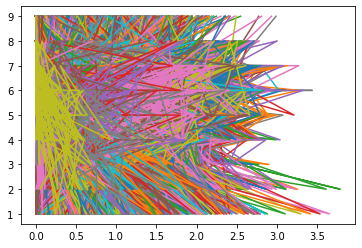

In [65]:
plt.plot(x_train, y_train_pred);
plt.show()

In [66]:
mae_mlr_train = mean_absolute_error(y_train, y_train_pred)
mse_mlr_train = mean_squared_error(y_train, y_train_pred)
rmse_mlr_train = np.sqrt(mse_mlr_train)

In [67]:
mae_mlr_train

2.587436437945851e-15

In [68]:
mse_mlr_train

1.1718556138061783e-29

In [69]:
print(f'Mean absolute error for training set: {mae_mlr_train:.2f}')
print(f'Mean squared error for training set: {mse_mlr_train:.2f}')
print(f'Root mean squared error for training set: {rmse_mlr_train:.2f}')

Mean absolute error for training set: 0.00
Mean squared error for training set: 0.00
Root mean squared error for training set: 0.00


In [70]:
y_val_pred= linreg.predict(x_val)

In [71]:
mae_mlr_val = mean_absolute_error(y_val, y_val_pred)
mse_mlr_val = mean_squared_error(y_val, y_val_pred)
rmse_mlr_val = np.sqrt(mse_mlr_val)

In [72]:
mae_mlr_val

0.8320303303899533

In [73]:
mse_mlr_val

1.0246616206131949

In [86]:
intervals = 20
i = 3
iters_kb = []
loss_train_kb = []
loss_val_kb = []
while(i<=500):
    w_train5, costlist_train5, d_train5, iter_no_train5, costlist_train5_val = gradientDescent_ridget(x_val_new, y_val, new_x, y_train, 0.1, i)
    MSE_final_train5 = (1.0/np.shape(new_x)[0])*(np.linalg.norm(new_x.dot(w_train5)-y_train,2)**2) 
    MSE_final_val5 = (1.0/np.shape(x_val_new)[0])*(np.linalg.norm(x_val_new.dot(w_train5)-y_val,2)**2)
    loss_train_kb.append(MSE_final_train5)
    loss_val_kb.append(MSE_final_val5)
    iters_kb.append(i)
    i = i+5

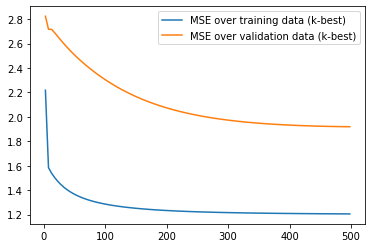

In [87]:
plt.plot(iters_kb, loss_train_kb, label = "MSE over training data (k-best)")
plt.plot(iters_kb, loss_val_kb, label = "MSE over validation data (k-best)")
plt.legend()
plt.show()

## Feature Selection

### K-Best

In [74]:
x_new = SelectKBest(score_func=f_regression, k=10)
x_new.fit_transform(x_train, y_train)
new_x = x_new.transform(x_train)
new_df = x_train.iloc[:,x_new.get_support()]

In [75]:
column_headers = list(new_df.columns.values)

In [76]:
x_val_new = pd.DataFrame()
for i in column_headers: 
    x_val_new[i] = x_val[i].values

In [77]:
x_val_new.to_numpy()

array([[1.60380520e+00, 1.59629480e+00, 1.49233620e+00, 0.00000000e+00,
        1.67630450e+00, 1.08343820e+00, 1.93654910e-02, 0.00000000e+00,
        1.72113310e+00, 1.38036300e+00],
       [7.81468600e-02, 2.79176120e-01, 1.03724660e+00, 9.91719960e-01,
        1.79816770e-01, 2.92851120e-01, 2.08471420e+00, 1.16294430e+00,
        6.61398600e-01, 7.28250560e-01],
       [2.76764580e-02, 2.55546720e-02, 0.00000000e+00, 1.13866410e+00,
        1.17630010e-01, 1.67642220e-01, 1.74530600e+00, 1.31929470e+00,
        1.44460770e-01, 0.00000000e+00],
       [8.56057800e-01, 1.43155560e+00, 1.01340820e+00, 3.91642060e-01,
        3.17294420e-01, 7.18947650e-01, 1.58084050e+00, 4.98772530e-01,
        5.88550270e-01, 7.01820140e-01],
       [5.74930700e-01, 2.06454440e+00, 1.45880890e+00, 7.06564400e-01,
        4.96524130e-01, 1.17339460e+00, 1.72531410e+00, 6.48744170e-01,
        5.90492900e-01, 9.21708800e-01],
       [7.52427040e-01, 9.25427260e-01, 5.80368200e-01, 3.67321940e-01,
   

In [78]:
def gradientDescent_kbest(X_val,Y_val,X, Y, alpha, maxNumIterations):
    m = np.shape(X)[0] #total samples
    n = np.shape(X)[1]  # total number of features = 2049
    #W = np.random.randn(n)
    W = np.zeros(n)
    cost_history_list = []
    cost_history_list_val = []
    reltol = 0.001
    diff = 0
    for current_iteration in range(maxNumIterations): 
        y_estimated = X.dot(W)
        error = y_estimated - Y
        cost_train = (1.0/np.shape(X)[0])*(np.linalg.norm(X.dot(W)-Y,2)**2) 
        gradient = (1 / m) * X.T.dot(error)
        W = W - alpha * gradient
        cost_history_list.append(cost_train)

        
    return W, cost_history_list,diff, current_iteration,cost_history_list_val

In [224]:
w_kbest,cost_kbest,d_kbest, i_kbest, cost_kbest_val = gradientDescent_kbest(x_val, y_val, new_x, y_train, 0.1,1000)

In [233]:
i_kbest

999

In [225]:
MSE_kbest = (1.0/np.shape(new_x)[0])*(np.linalg.norm(new_x.dot(w_kbest)-y_train,2)**2) 
MAE_kbest = (1.0/np.shape(new_x)[0])*np.linalg.norm(new_x.dot(w_kbest)-y_train,1)

In [226]:
MSE_kbest

1.2002533474772836

In [227]:
MAE_kbest

0.8437166072184159

In [228]:
MSE_kbest_val = (1.0/np.shape(x_val_new)[0])*(np.linalg.norm(x_val_new.dot(w_kbest) - y_val,2)**2) 
MAE_kbest_val = (1.0/np.shape(x_val_new)[0])*np.linalg.norm(x_val_new.dot(w_kbest) - y_val,1)

In [229]:
MSE_kbest_val

1.9449506224335318

In [230]:
MAE_kbest_val

1.1047365824229132

In [231]:
intervals = 20
i = 3
iters_kb = []
loss_train_kb = []
loss_val_kb = []
while(i<=1000):
    w_train5, costlist_train5, d_train5, iter_no_train5, costlist_train5_val = gradientDescent_kbest(x_val_new, y_val, new_x, y_train, 0.1, i)
    MSE_final_train5 = (1.0/np.shape(new_x)[0])*(np.linalg.norm(new_x.dot(w_train5)-y_train,2)**2) 
    MSE_final_val5 = (1.0/np.shape(x_val_new)[0])*(np.linalg.norm(x_val_new.dot(w_train5)-y_val,2)**2)
    loss_train_kb.append(MSE_final_train5)
    loss_val_kb.append(MSE_final_val5)
    iters_kb.append(i)
    i = i+5

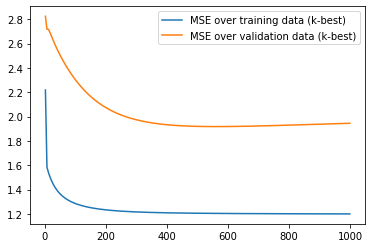

In [232]:
plt.plot(iters_kb, loss_train_kb, label = "MSE over training data (k-best)")
plt.plot(iters_kb, loss_val_kb, label = "MSE over validation data (k-best)")
plt.legend()
plt.show()

### Select From Model

In [234]:
ridge = Ridge().fit(x_train, y_train)
model = SelectFromModel(ridge, prefit=True, threshold='mean', max_features=10)
x_transformed = model.transform(x_train)
x_df_new = x_train.iloc[:,model.get_support()]

In [235]:
x_transformed.shape

(144, 10)

In [236]:
x_df_new

,214,344,668,690,1484,1493,1516,1517,1749,1782
0,0.860366,0.752746,2.203574,1.092973,0.269468,1.770734,0.263249,1.353877,2.018321,1.890554
1,0.018758,0.071188,0.675391,1.739626,0.848009,0.776612,1.392530,1.049541,1.335249,0.249057
2,0.000000,0.102037,1.016187,0.852223,0.044014,0.565988,0.865551,0.921711,1.464799,1.051859
3,0.000000,0.000000,0.012567,0.000000,0.088898,0.559217,0.000000,0.014584,0.102111,0.241141
4,0.000509,0.852059,1.084070,1.686691,0.235616,0.138077,0.818055,0.196424,1.245720,1.029146
...,...,...,...,...,...,...,...,...,...,...
139,0.383463,0.000766,1.400528,0.003631,0.452982,0.266802,0.146729,0.046790,0.231263,0.038126
140,0.000000,0.002517,1.139348,0.798239,1.286528,1.165194,0.249762,0.361271,1.441949,0.340313
141,0.142265,0.436515,1.836082,0.777734,0.074305,0.488835,0.204842,1.613883,0.903559,0.706974
142,0.333810,0.168180,0.281398,1.874995,0.930073,0.649233,1.525217,0.229686,0.729138,0.774261


In [237]:
column_headers = list(x_df_new.columns.values)

In [238]:
x_val_sfm = pd.DataFrame()
for i in column_headers: 
    x_val_sfm[i] = x_val[i].values

In [239]:
x_val_sfm.to_numpy()

array([[1.60380520e+00, 1.59629480e+00, 1.49233620e+00, 0.00000000e+00,
        1.67630450e+00, 1.08343820e+00, 1.93654910e-02, 0.00000000e+00,
        1.72113310e+00, 1.38036300e+00],
       [7.81468600e-02, 2.79176120e-01, 1.03724660e+00, 9.91719960e-01,
        1.79816770e-01, 2.92851120e-01, 2.08471420e+00, 1.16294430e+00,
        6.61398600e-01, 7.28250560e-01],
       [2.76764580e-02, 2.55546720e-02, 0.00000000e+00, 1.13866410e+00,
        1.17630010e-01, 1.67642220e-01, 1.74530600e+00, 1.31929470e+00,
        1.44460770e-01, 0.00000000e+00],
       [8.56057800e-01, 1.43155560e+00, 1.01340820e+00, 3.91642060e-01,
        3.17294420e-01, 7.18947650e-01, 1.58084050e+00, 4.98772530e-01,
        5.88550270e-01, 7.01820140e-01],
       [5.74930700e-01, 2.06454440e+00, 1.45880890e+00, 7.06564400e-01,
        4.96524130e-01, 1.17339460e+00, 1.72531410e+00, 6.48744170e-01,
        5.90492900e-01, 9.21708800e-01],
       [7.52427040e-01, 9.25427260e-01, 5.80368200e-01, 3.67321940e-01,
   

In [273]:
weight_sfm,cost_sfm,d_sfm, i_sfm, cost_sfm_val = gradientDescent_kbest(x_val_sfm, y_val, x_transformed, y_train, 0.1,1000)

In [274]:
MSE_sfm = (1.0/np.shape(x_transformed)[0])*(np.linalg.norm(x_transformed.dot(weight_sfm)-y_train,2)**2) 
MAE_sfm = (1.0/np.shape(x_transformed)[0])*np.linalg.norm(x_transformed.dot(weight_sfm)-y_train,1)

In [275]:
MSE_sfm

1.128499249242601

In [276]:
MAE_sfm

0.8407218992215192

In [277]:
MSE_sfm_val = (1.0/np.shape(x_val_sfm)[0])*(np.linalg.norm(x_val_sfm.dot(weight_sfm)-y_val,2)**2) 
MAE_sfm_val = (1.0/np.shape(x_val_sfm)[0])*np.linalg.norm(x_val_sfm.dot(weight_sfm)-y_val,1)

In [278]:
MSE_sfm_val

2.869999624821459

In [279]:
MAE_sfm_val

1.2359936751750642

In [271]:
intervals = 20
i = 3
iters_sfm = []
loss_train_sfm = []
loss_val_sfm = []
while(i<=2000):
    w_train5, costlist_train5, d_train5, iter_no_train5, costlist_train5_val = gradientDescent_kbest(x_val_sfm, y_val, x_transformed, y_train, 0.1, i)
    MSE_final_train5 = (1.0/np.shape(x_transformed)[0])*(np.linalg.norm(x_transformed.dot(w_train5)-y_train,2)**2) 
    MSE_final_val5 = (1.0/np.shape(x_val_sfm)[0])*(np.linalg.norm(x_val_sfm.dot(w_train5)-y_val,2)**2)
    loss_train_sfm.append(MSE_final_train5)
    loss_val_sfm.append(MSE_final_val5)
    iters_sfm.append(i)
    i = i+5

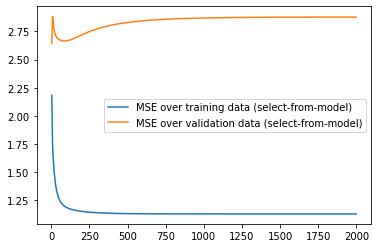

In [272]:
plt.plot(iters_sfm, loss_train_sfm, label = "MSE over training data (select-from-model)")
plt.plot(iters_sfm, loss_val_sfm, label = "MSE over validation data (select-from-model)")
plt.legend()
plt.show()

### Classification

In [538]:
def Loss(w,x,y):
    m = x.shape[0] #number of samples
    h = scipy.sparse.csr_matrix((np.ones(y.shape[0]), (y, np.array(range(y.shape[0])))))
    h = np.array(h.todense()).T
    h=h[:,1:]
    scores = np.dot(x,w)
    scores -= np.max(scores)
    like = (np.exp(scores).T /np.sum(np.exp(scores),axis=1)).T
    #loss = (-1 / m) * np.sum(h * np.log(like)) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(h - like)) #And compute the gradient for that loss
    return grad

In [539]:
def classify(x_test,x_train,y_train):
    w = np.zeros([x_train.shape[1],len(np.unique(y_train))])
    iterat = 1000
    alpha = 0.00001
    for i in range(0,iterat):
        grad = Loss(w,x_train,y_train)
        w = w - (alpha * grad)
    s = np.dot(x_test,w)
    s-=np.max(s)
    a =(np.exp(s).T / np.sum(np.exp(s),axis=1)).T
    b = np.argmax(a,axis=1)
    return b  

In [541]:
b = classify(x_val,x_train,y_train)
accuracy = sum(b == y_val)/(float(len(y_val)))
accuracy

0.19047619047619047

### Visualisation

#### 3.1

In [1456]:
intervals = 20
i = 3
iters_1 = []
loss_train_1 = []
loss_val_1 = []
while(i<=70):
    w_train5, costlist_train5, d_train5, iter_no_train5, costlist_train5_val = gradientDescent(x_val, y_val, x_train, y_train, 0.0029, i)
    MSE_final_train5 = (1.0/np.shape(x_train)[0])*(np.linalg.norm(x_train.dot(w_train5)-y_train,2)**2) 
    MSE_final_val5 = (1.0/np.shape(x_val)[0])*(np.linalg.norm(x_val.dot(w_train5)-y_val,2)**2)
    loss_train_1.append(MSE_final_train5)
    loss_val_1.append(MSE_final_val5)
    iters_1.append(i)
    i = i+5

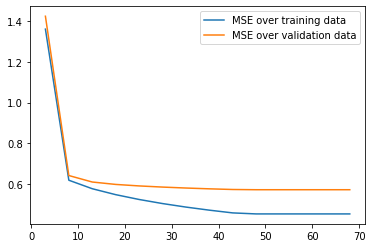

In [1748]:
plt.plot(iters_1, loss_train_1, label = "MSE over training data")
plt.plot(iters_1, loss_val_1, label = "MSE over validation data")
plt.legend()
plt.show()

#### 3.4

### Normalisation of data

In [287]:
def gradientDescent_norm(X_val,Y_val,X, Y, alpha, maxNumIterations):
    m = np.shape(X)[0] #total samples
    n = np.shape(X)[1]  # total number of features = 2049
    #W = np.random.randn(n)
    W = np.zeros(n)
    cost_history_list = []
    cost_history_list_val = []
    reltol = 0.0001
    diff = 0
    for current_iteration in range(maxNumIterations):  # begin the process
 
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - Y
 
        # calculate the cost (Mean squared error - MSE)
        cost_train = (1.0/np.shape(X)[0])*(np.linalg.norm(X.dot(W)-Y,2)**2) 
        
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated_val = X_val.dot(W)
 
        # calculate the difference between the actual and predicted value
        error_val = y_estimated_val - Y_val
 
        # calculate the cost (Mean squared error - MSE)
        cost_val = (1.0/np.shape(X_val)[0])*(np.linalg.norm(X_val.dot(W)-Y_val,2)**2)
        if(current_iteration > 0):
            diff = (cost_history_list_val[-1] - cost_val)/cost_history_list_val[-1]
            if(np.abs(diff)<reltol):
                cost_history_list.append(cost_train)
                cost_history_list_val.append(cost_val)
                break
        # Update our gradient by the dot product between
        # the transpose of 'X' and our error divided by the
        # total number of samples
        gradient = (1 / m) * X.T.dot(error)
 
        # Now we have to update our weights
        W = W - alpha * gradient
        cost_history_list.append(cost_train)
        cost_history_list_val.append(cost_val)
        
    return W, cost_history_list,diff, current_iteration,cost_history_list_val

In [281]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,1.0,0.001818,0.058018,0.079352,0.017937,0.138092,0.781016,0.809967,0.040714,0.000000,...,0.000000,0.000000,0.011508,0.068883,0.080087,0.214424,0.041340,0.000000,0.000000,0.000656
1,1.0,0.130129,0.223518,0.022346,0.007356,0.883341,0.961499,0.819911,0.301842,0.195972,...,0.013055,0.024077,0.392501,0.330532,0.056257,0.053240,0.054429,0.061702,0.019216,0.018923
2,1.0,0.272370,0.041683,0.261952,0.337672,0.904324,1.291325,0.854422,0.198708,0.405038,...,0.058794,0.200053,0.010550,0.019223,0.000900,0.000000,0.000349,0.000000,0.004310,0.075912
3,1.0,0.561121,1.004120,0.113220,0.017158,0.034897,0.083389,0.812934,1.371410,0.804364,...,1.233769,0.591835,0.257092,0.003301,0.000181,0.000074,0.008841,0.082230,0.760075,0.242426
4,1.0,0.307962,0.060208,0.000000,0.004815,0.000000,0.110576,0.932561,0.736380,0.574772,...,0.340173,0.245761,0.319120,0.084845,0.227459,0.047097,0.008360,0.085537,0.737439,0.541516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.0,0.080337,0.113459,0.000000,0.263067,0.793175,0.708464,0.677974,0.658172,0.334076,...,1.085883,0.240108,0.546721,0.075773,0.000000,0.000000,0.074494,0.131913,0.439946,0.048584
140,1.0,0.282189,0.167384,0.000000,0.006451,0.517041,0.508104,0.998750,0.882848,0.684527,...,0.000000,0.000000,0.042506,0.000000,0.000000,0.006734,0.016319,0.003699,0.005598,0.004469
141,1.0,0.144755,0.008022,0.233142,0.229731,0.425840,1.006119,1.492812,0.199921,0.124334,...,0.000000,0.000000,0.000000,0.044381,0.051433,0.093931,0.000000,0.000000,0.000000,0.001446
142,1.0,0.051360,0.000000,0.002099,0.278802,1.249910,1.254209,0.548353,0.066152,0.038942,...,0.000000,0.000000,0.106748,0.710095,1.698106,0.650351,0.097046,0.001933,0.000000,0.000695


In [282]:
# copy the data
x_scaled = x_train.copy()
  
# apply normalization techniques
for column in x_scaled.columns:
    x_scaled[column] = (x_scaled[column] -
                           x_scaled[column].mean()) / x_scaled[column].std()    


In [283]:
# copy the data
x_scaled_val = x_val.copy()
  
# apply normalization techniques
for column in x_scaled.columns:
    x_scaled_val[column] = (x_scaled_val[column] -
                           x_scaled_val[column].mean()) / x_scaled_val[column].std()    


In [284]:
x_scaled_val

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,NaN,2.906062,2.874391,1.886859,1.075325,0.167299,-0.310911,-0.747887,0.716414,1.453324,...,1.008990,1.359467,1.344726,-0.600662,0.016418,-0.160607,-0.388451,0.034874,0.417000,0.623241
1,NaN,-0.229437,-0.470667,-0.512785,-0.587586,0.139618,-0.987724,-1.569433,-1.444739,1.177160,...,-0.298592,1.294853,-0.696068,-0.257570,-0.122681,-0.725802,-0.378997,0.285000,2.343073,2.360573
2,NaN,1.825190,0.129921,-0.467713,-0.322299,1.934960,1.035647,1.032048,0.559465,1.134725,...,-0.765433,-0.988362,-0.757014,2.006400,3.361701,2.849209,2.576946,0.333927,-0.938166,-0.906647
3,NaN,-0.444692,-0.707059,-0.558286,-0.659561,-1.024648,-0.745284,-0.713029,-0.093365,-0.154859,...,0.022176,0.306104,-0.083285,-0.023206,-0.212677,-0.580649,-0.554830,-0.721494,0.701080,0.972681
4,NaN,0.641108,2.101416,1.533014,0.304069,-0.142790,-0.739547,-0.946916,0.017439,0.771699,...,0.626621,-0.348236,2.400277,-0.280260,-0.669418,-0.831366,-0.513921,2.842692,0.545614,-0.292700
5,NaN,0.431478,-0.304321,-0.558286,-0.600714,-0.918764,-0.818785,-1.656423,-1.250602,-0.226677,...,0.653465,-0.407791,-0.201427,-0.418849,-0.664061,-0.796836,-0.577810,-0.697196,0.726674,-0.079788
6,NaN,-1.076583,-0.689514,-0.172044,-0.190674,2.331138,1.621789,0.493717,-1.284392,-1.459608,...,-0.765433,-0.986329,-0.586748,1.049320,-0.700299,-0.517555,0.103250,2.646005,-0.973392,-0.961161
7,NaN,-0.782632,-0.702393,-0.547545,0.043452,0.267858,0.958966,1.189583,0.692013,-1.206192,...,-0.713953,-0.458596,-0.813096,-0.820671,-0.720618,-0.807565,-0.575140,-0.707402,-0.964158,-0.746760
8,NaN,-0.721011,0.545200,-0.185509,-0.659561,0.225629,0.642908,-0.491306,-1.422345,-0.608451,...,-0.591298,-0.906489,-0.659886,-0.157057,-0.645205,-0.457963,-0.280175,-0.376665,-0.780969,-0.903162
9,NaN,0.051464,0.325050,-0.550095,-0.659553,-0.436444,-0.661957,-0.513368,0.165263,-1.412062,...,-0.256704,-0.525768,0.986334,-0.579476,-0.073800,-0.297915,-0.553590,-0.515343,1.185314,1.197724


In [285]:
x_scaled[0] = 1

In [286]:
x_scaled_val[0]=1

#### Training data, alpha = 0.1

In [288]:
w_train1_scaled, costlist_train1_scaled, d_train1_scaled, iter_no_train1_scaled,costlist_val1_scaled = gradientDescent_norm(x_scaled_val, y_val,x_scaled, y_train, 0.1, 100)

/var/folders/8v/4n20m59n1z7g8vbcnjym5g_r0000gn/T/ipykernel_58381/210765640.py:30: RuntimeWarning: invalid value encountered in double_scalars
  diff = (cost_history_list_val[-1] - cost_val)/cost_history_list_val[-1]


In [289]:
mean_squared_error(np.dot(x_scaled,w_train1_scaled.T),y_train)

/Users/valayaramchandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


inf

In [290]:
MSE_final_train1_scaled = (1.0/np.shape(x_scaled)[0])*(np.linalg.norm(x_scaled.dot(w_train1_scaled)-y_train,2)**2) 
MAE_final_train1_scaled = (1.0/np.shape(x_scaled)[0])*np.linalg.norm(x_scaled.dot(w_train1_scaled)-y_train,1)

In [291]:
MSE_final_train1_scaled

inf

In [292]:
MAE_final_train1_scaled

1.867894734909265e+164

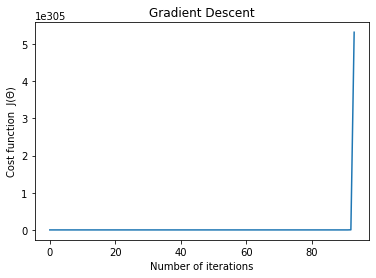

In [293]:
plt.plot(np.arange(len(costlist_train1_scaled)), costlist_train1_scaled)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function  J(Θ)")
plt.title("Gradient Descent")
plt.show()

The learning rate is not appropriate because the cost function is diverging.

#### Validation data, alpha = 0.1

In [294]:
MSE_final_val1_scaled = (1.0/np.shape(x_scaled_val)[0])*(np.linalg.norm(x_scaled_val.dot(w_train1_scaled)-y_val,2)**2) 
MAE_final_val1_scaled = (1.0/np.shape(x_scaled_val)[0])*np.linalg.norm(x_scaled_val.dot(w_train1_scaled)-y_val,1)

In [295]:
MSE_final_val1_scaled

inf

In [296]:
MAE_final_val1_scaled

1.6396097299521006e+164

#### Training data, alpha = 0.01

In [297]:
w_train2_scaled, costlist_train2_scaled, d_train2_scaled, iter_no_train2_scaled, costlist_val2_scaled = gradientDescent_norm(x_scaled_val, y_val,x_scaled, y_train, 0.01, 100)

In [298]:
mean_squared_error(np.dot(x_scaled,w_train2_scaled.T),y_train)

6.406398664361245e+108

In [299]:
MSE_final_train2_scaled = (1.0/np.shape(x_scaled)[0])*(np.linalg.norm(x_scaled.dot(w_train2_scaled)-y_train,2)**2) 
MAE_final_train2_scaled = (1.0/np.shape(x_scaled)[0])*np.linalg.norm(x_scaled.dot(w_train2_scaled)-y_train,1)

In [300]:
MSE_final_train2_scaled

6.406398664361245e+108

In [301]:
MAE_final_train2_scaled

2.0556065418492623e+54

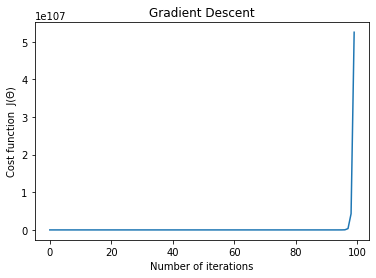

In [302]:
plt.plot(np.arange(len(costlist_train2_scaled)), costlist_train2_scaled)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function  J(Θ)")
plt.title("Gradient Descent")
plt.show()

The learning rate is not appropriate because the cost function is diverging.

#### Validation data, alpha = 0.01

In [303]:
MSE_final_val2_scaled = (1.0/np.shape(x_scaled_val)[0])*(np.linalg.norm(x_scaled_val.dot(w_train2_scaled)-y_val,2)**2) 
MAE_final_val2_scaled = (1.0/np.shape(x_scaled_val)[0])*np.linalg.norm(x_scaled_val.dot(w_train2_scaled)-y_val,1)

In [304]:
MSE_final_val2_scaled

5.363662968849283e+108

In [305]:
MAE_final_val2_scaled

1.804380313290492e+54

#### Training data, alpha = 0.001

In [306]:
w_train3_scaled, costlist_train3_scaled, d_train3_scaled, iter_no_train3_scaled, costlist_val3_scaled = gradientDescent_norm(x_scaled_val, y_val,x_scaled, y_train, 0.001, 1500)

In [307]:
w_train3_scaled

0       4.154991
1      -0.014823
2      -0.005276
3       0.007096
4       0.007681
          ...   
2044    0.010724
2045    0.019039
2046    0.009875
2047    0.002868
2048    0.000212
Length: 2049, dtype: float64

In [308]:
costlist_train3_scaled

[30.819444444444443,
 29.666088825663056,
 29.262774229595895,
 29.088171586323146,
 28.983996683377054,
 28.902119457986828,
 28.82784281453146,
 28.75662549723976,
 28.687018452487536,
 28.618520179046612,
 28.550924643764024,
 28.484122246549468,
 28.418038432867544,
 28.352614232542663,
 28.287799655050346,
 28.223551097481867,
 28.159830062210936,
 28.096602348125007,
 28.033837448709452,
 27.971508065470033,
 27.90958970028256,
 27.84806030853953,
 27.786900001766384,
 27.72609079145923,
 27.665616367652866,
 27.605461906929907,
 27.545613905494637,
 27.48606003365958,
 27.42678900868302,
 27.36779048337893,
 27.30905494832103,
 27.25057364579433,
 27.19233849392392,
 27.134342019641792,
 27.076577299346518,
 27.019037906273354,
 26.961717863730374,
 26.904611603472652,
 26.847713928585314,
 26.7910199803312,
 26.73452520848987,
 26.67822534477747,
 26.622116378988736,
 26.566194537548892,
 26.5104562642016,
 26.45489820259365,
 26.399517180546013,
 26.344310195826534,
 26.289274

In [309]:
iter_no_train3_scaled

1499

In [310]:
mean_squared_error(np.dot(x_scaled,w_train3_scaled.T),y_train)

1.4264399313974165

In [311]:
MSE_final_train3_scaled = (1.0/np.shape(x_scaled)[0])*(np.linalg.norm(x_scaled.dot(w_train3_scaled)-y_train,2)**2) 
MAE_final_train3_scaled = (1.0/np.shape(x_scaled)[0])*np.linalg.norm(x_scaled.dot(w_train3_scaled)-y_train,1)

In [312]:
MSE_final_train3_scaled

1.4264399313974165

In [313]:
MAE_final_train3_scaled

1.1922314448002396

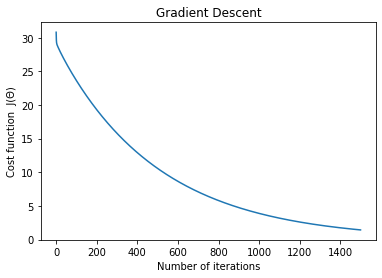

In [314]:
plt.plot(np.arange(len(costlist_train3_scaled)), costlist_train3_scaled)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function  J(Θ)")
plt.title("Gradient Descent")
plt.show()

#### Validation data, alpha = 0.001

In [315]:
MSE_final_val3_scaled = (1.0/np.shape(x_scaled_val)[0])*(np.linalg.norm(x_scaled_val.dot(w_train3_scaled)-y_val,2)**2) 
MAE_final_val3_scaled = (1.0/np.shape(x_scaled_val)[0])*np.linalg.norm(x_scaled_val.dot(w_train3_scaled)-y_val,1)

In [316]:
MSE_final_val3_scaled

2.0292831587500513

In [317]:
MAE_final_val3_scaled

1.301301666506516

In [1555]:
i=0.001
mse_history_list_scaled = []
mae_history_list_scaled = []
i_list_scaled = []
while i<=0.0045:
    w_train3_scaled, costlist_train3_scaled, d_train3_scaled, iter_no_train3_scaled, costlist_val3_scaled = gradientDescent_norm(x_scaled_val, y_val,x_scaled, y_train, i, 200)
    mse = (1.0/np.shape(x_scaled_val)[0])*(np.linalg.norm(x_scaled_val.dot(w_train3_scaled)-y_val,2)**2) 
    mae = (1.0/np.shape(x_scaled_val)[0])*np.linalg.norm(x_scaled_val.dot(w_train3_scaled)-y_val,1)
    mse_history_list_scaled.append(mse)
    mae_history_list_scaled.append(mae)
    i_list_scaled.append(i)
    i=i+0.0002


In [1556]:
mse_history_list_scaled

[19.977771575018863,
 18.494410527313125,
 17.123641754511443,
 15.857191529868304,
 14.68727032694072,
 13.606608552031775,
 12.608451525401843,
 11.68653726119166,
 10.835067715811965,
 10.04867827793866,
 9.322407608914142,
 8.651668736733699,
 8.032221759376212,
 7.4601482640428864,
 6.931827455507383,
 6.443913935728334,
 5.993317054692453,
 5.578152973188341]

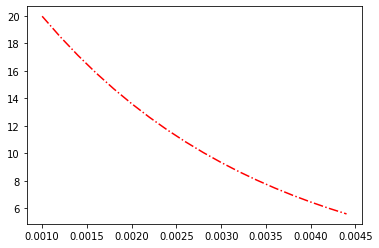

In [1557]:
plt.plot(i_list_scaled, mse_history_list_scaled, 'r-.')
plt.show()

It can be observed that there is a minima around learning rate = 0.0045, which is why we tune the parameter to be set around this value for our model. 

In [318]:
w_train4_scaled, costlist_train4_scaled, d_train4_scaled, iter_no_train4_scaled,costlist_val4_scaled = gradientDescent_norm(x_scaled_val, y_val,x_scaled, y_train, 0.0044, 2000)

In [319]:
iter_no_train4_scaled

1011

In [320]:
MSE_final_val4_scaled = (1.0/np.shape(x_scaled_val)[0])*(np.linalg.norm(x_scaled_val.dot(w_train4_scaled)-y_val,2)**2) 
MAE_final_val4_scaled = (1.0/np.shape(x_scaled_val)[0])*np.linalg.norm(x_scaled_val.dot(w_train4_scaled)-y_val,1)

In [321]:
MSE_final_val4_scaled

0.5348206717343327

In [322]:
MAE_final_val4_scaled

0.5557382286723469

In [325]:
MSE_final_train4_scaled = (1.0/np.shape(x_scaled)[0])*(np.linalg.norm(x_scaled.dot(w_train4_scaled)-y_train,2)**2) 
MAE_final_train4_scaled = (1.0/np.shape(x_scaled)[0])*np.linalg.norm(x_scaled.dot(w_train4_scaled)-y_train,1)

In [326]:
MSE_final_train4_scaled

0.003868711227394219

In [327]:
MAE_final_train4_scaled

0.061936967345237466

For the tuned model, the number of iterations = 1378 and learning rate = 0.0044. 

In [323]:
intervals = 20
i = 69
iters_1_norm = []
loss_train_1_norm = []
loss_val_1_norm = []
while(i<=1380):
    w_train5, costlist_train5, d_train5, iter_no_train5, costlist_train5_val = gradientDescent_norm(x_val, y_val, x_train, y_train, 0.0029, i)
    MSE_final_train5 = (1.0/np.shape(x_train)[0])*(np.linalg.norm(x_train.dot(w_train5)-y_train,2)**2) 
    MSE_final_val5 = (1.0/np.shape(x_val)[0])*(np.linalg.norm(x_val.dot(w_train5)-y_val,2)**2)
    loss_train_1_norm.append(MSE_final_train5)
    loss_val_1_norm.append(MSE_final_val5)
    iters_1_norm.append(i)
    i = i+69

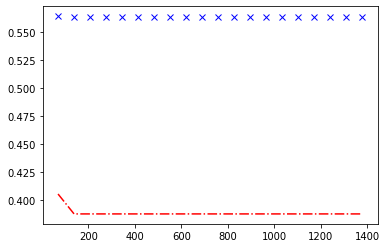

In [1576]:
plt.plot(iters_1_norm, loss_train_1_norm, 'r-.', iters_1_norm, loss_val_1_norm, 'bx')

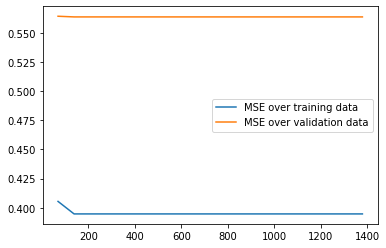

In [324]:
plt.plot(iters_1_norm, loss_train_1_norm, label = "MSE over training data")
plt.plot(iters_1_norm, loss_val_1_norm, label = "MSE over validation data")
plt.legend()
plt.show()

### Sampling - A

In [413]:
x_a, x_a_test, y_a, y_a_test = train_test_split(
    x_scaled, y_train, test_size=0.25, random_state=0)

In [434]:
w_a, costlist_a, d_a, iter_a,costlist_a = gradientDescent_norm(x_scaled_val, y_val,x_a, y_a, 0.004, 200)

In [435]:
iter_a

199

In [436]:
MSE_a_train = (1.0/np.shape(x_a)[0])*(np.linalg.norm(x_a.dot(w_a)-y_a,2)**2) 
MAE_a_train = (1.0/np.shape(x_a)[0])*np.linalg.norm(x_a.dot(w_a)-y_a,1)

In [437]:
MSE_a_train

0.9339472325405362

In [438]:
MAE_a_train

0.8575069202646216

In [439]:
MSE_a = (1.0/np.shape(x_scaled_val)[0])*(np.linalg.norm(x_scaled_val.dot(w_a)-y_val,2)**2) 
MAE_a = (1.0/np.shape(x_scaled_val)[0])*np.linalg.norm(x_scaled_val.dot(w_a)-y_val,1)

In [440]:
MSE_a

22.514418370705663

In [441]:
MAE_a

3.7342366907423026

In [442]:
intervals = 20
i = 10
iters_a = []
loss_train_a= []
loss_val_a = []
while(i<=100):
    w_train5, costlist_train5, d_train5, iter_no_train5, costlist_train5_val = gradientDescent_norm(x_val, y_val, x_a, y_a, 0.001, i)
    MSE_final_train5 = (1.0/np.shape(x_a)[0])*(np.linalg.norm(x_a.dot(w_train5)-y_a,2)**2) 
    MSE_final_val5 = (1.0/np.shape(x_scaled_val)[0])*(np.linalg.norm(x_scaled_val.dot(w_train5)-y_val,2)**2)
    loss_train_a.append(MSE_final_train5)
    loss_val_a.append(MSE_final_val5)
    iters_a.append(i)
    i = i+5

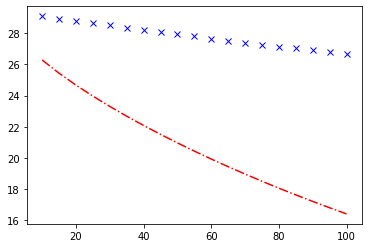

In [443]:
plt.plot(iters_a, loss_train_a, 'r-.', iters_a, loss_val_a, 'bx')

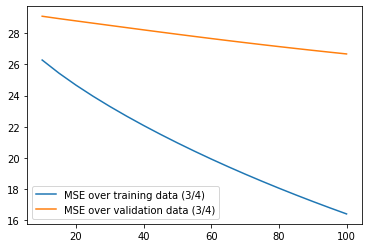

In [445]:
plt.plot(iters_a, loss_train_a, label = "MSE over training data (3/4)")
plt.plot(iters_a, loss_val_a, label = "MSE over validation data (3/4)")
plt.legend()
plt.show()

### Sampling - B

In [504]:
x_b1, x_b2, y_b1, y_b2 = train_test_split(
    x_train, y_train, test_size=0.5, random_state=0)

In [507]:
w_b1, costlist_b1,costlist_b1 = gradientDescent_ridge(x_val, y_val, x_b1, y_b1, 5)

In [508]:
w_b2, costlist_b2,costlist_b2 = gradientDescent_ridge(x_val, y_val, x_b2, y_b2, 5)

In [512]:
y_b1_est_ridge = x_val.dot(w_b1)

In [513]:
y_b1_est_ridge

0     1.586032
1     4.554787
2     5.391144
3     4.654285
4     4.285786
5     4.386402
6     7.527569
7     6.031235
8     4.969919
9     4.576925
10    4.552285
11    5.456708
12    6.063716
13    4.292570
14    7.030020
15    4.342704
16    4.752258
17    5.956825
18    6.311183
19    5.552896
20    8.243487
dtype: float64

In [514]:
y_b2_est_ridge = x_val.dot(w_b2)

In [515]:
y_b2_est_ridge

0     2.086383
1     5.985410
2     5.566006
3     5.443859
4     4.462602
5     5.013574
6     6.851723
7     5.878055
8     4.455827
9     4.894759
10    5.469600
11    4.857469
12    6.834795
13    4.852205
14    5.952962
15    4.272604
16    6.115655
17    4.972994
18    6.123791
19    5.896403
20    8.269698
dtype: float64

In [516]:
dff_ridge = abs(y_b1_est_ridge - y_b2_est_ridge)

In [517]:
dff_ridge

0     0.500351
1     1.430624
2     0.174862
3     0.789574
4     0.176816
5     0.627172
6     0.675845
7     0.153180
8     0.514093
9     0.317834
10    0.917315
11    0.599239
12    0.771079
13    0.559635
14    1.077059
15    0.070099
16    1.363397
17    0.983831
18    0.187393
19    0.343507
20    0.026211
dtype: float64

In [1737]:
i=0.0001
mse_history_list_b = []
mae_history_list_b = []
i_list_b = []
while i<=0.004:
    w_train3_scaled, costlist_train3_scaled, d_train3_scaled, iter_no_train3_scaled, costlist_val3_scaled = gradientDescent_norm(x_scaled_val, y_val,x_b, y_b, i, 500)
    mse = (1.0/np.shape(x_scaled_val)[0])*(np.linalg.norm(x_scaled_val.dot(w_train3_scaled)-y_val,2)**2) 
    mae = (1.0/np.shape(x_scaled_val)[0])*np.linalg.norm(x_scaled_val.dot(w_train3_scaled)-y_val,1)
    mse_history_list_b.append(mse)
    mae_history_list_b.append(mae)
    i_list_b.append(i)
    i=i+0.0002

In [1738]:
mse_history_list_b

[29.625920685167785,
 29.622153690554534,
 43.795013606605124,
 29.61531767575958,
 47.15975702381437,
 47.80729617430154,
 48.166303952412306,
 48.37091686981021,
 48.49147617309238,
 48.56511289698537,
 48.611754282530555,
 48.642338585115844,
 48.656683359034815,
 48.66077971604994,
 48.6641467705492,
 48.66717697943506,
 48.669690325538845,
 48.67240503981425,
 48.674545811940256,
 48.6762638760175]

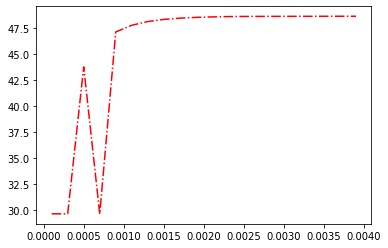

In [1739]:
plt.plot(i_list_b, mse_history_list_b, 'r-.')
plt.show()

In [1708]:
intervals = 20
i = 10
iters_a = []
loss_train_a= []
loss_val_a = []
while(i<=200):
    w_train5, costlist_train5, d_train5, iter_no_train5, costlist_train5_val = gradientDescent_norm(x_val, y_val, x_a, y_a, 0.001, i)
    MSE_final_train5 = (1.0/np.shape(x_a)[0])*(np.linalg.norm(x_a.dot(w_train5)-y_a,2)**2) 
    MSE_final_val5 = (1.0/np.shape(x_val)[0])*(np.linalg.norm(x_val.dot(w_train5)-y_val,2)**2)
    loss_train_a.append(MSE_final_train5)
    loss_val_a.append(MSE_final_val5)
    iters_a.append(i)
    i = i+10

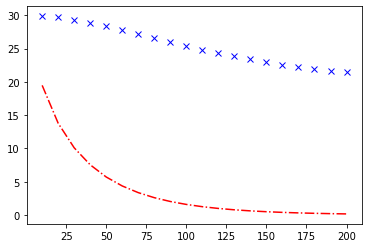

In [1709]:
plt.plot(iters_a, loss_train_a, 'r-.', iters_a, loss_val_a, 'bx')